# ***Analysis of Insertion and Deletion Averages Across Saliency Variants***

In this notebook, we will analyze and visualize the average statistics of insertion and deletion methods applied to the saliency maps/videos computed in previous notebooks. The focus will be on three distinct variants: **Spatial**, **Temporal**, and **Spatial-Temporal** saliency representations.

### Objectives:
1. **Compute Averages**: Calculate the average insertion and deletion statistics for each of the three saliency variants. This will provide insights into the effectiveness of the saliency maps in highlighting relevant features for model predictions.
   
2. **Visualize Results**: Create individual plots for the average insertion and deletion statistics for Spatial, Temporal, and Spatial-Temporal saliency. This will help in understanding the performance of each variant separately.

3. **Cumulative Plot**: Finally, we will produce a cumulative plot that combines the results from all three variants. This will offer a comprehensive view of how each method contributes to the overall performance in terms of insertion and deletion errors.

By the end of this notebook, we aim to derive meaningful conclusions about the impact of different saliency representations on the model's decision-making process and to visualize the comparative effectiveness of these techniques.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# Directories:
main_path = "/gdrive/MyDrive/ML-for-Agriforestry/Researches/Water_Resources/XAI/"
results_path = f"{main_path}results/"
results_st_path = f"{results_path}spatial-temporal/"
results_s_path = f"{results_path}spatial/"
results_t_path = f"{results_path}temporal/"

## ***ST-RISE***

In [ ]:
# Importing the insertion statistics for each instance in the Vottignasco Test Set

# Load insertion statistics for instances 0 to 20
st_insertion_stats_vott_norm_0to20 = np.load(f"{results_st_path}st_insertion_stats_vott_norm_0to20.npy", allow_pickle=True)
# Load insertion statistics for instances 20 to 40
st_insertion_stats_vott_norm_20to40 = np.load(f"{results_st_path}st_insertion_stats_vott_norm_20to40.npy", allow_pickle=True)
# Load insertion statistics for instances 40 to 60
st_insertion_stats_vott_norm_40to60 = np.load(f"{results_st_path}st_insertion_stats_vott_norm_40to60.npy", allow_pickle=True)
# Load insertion statistics for instances 60 to 80
st_insertion_stats_vott_norm_60to80 = np.load(f"{results_st_path}st_insertion_stats_vott_norm_60to80.npy", allow_pickle=True)
# Load insertion statistics for instances 80 to 100
st_insertion_stats_vott_norm_80to100 = np.load(f"{results_st_path}st_insertion_stats_vott_norm_80to100.npy", allow_pickle=True)
# Load insertion statistics for instances 100 to 105
st_insertion_stats_vott_norm_100to105 = np.load(f"{results_st_path}st_insertion_stats_vott_norm_100to105.npy", allow_pickle=True)


Mean Errors for Nr of Pixel Inserted, Vottignasco: 
 [0.6958838  0.70569575 0.6991336  ... 0.01040283 0.00932912 0.00882481]


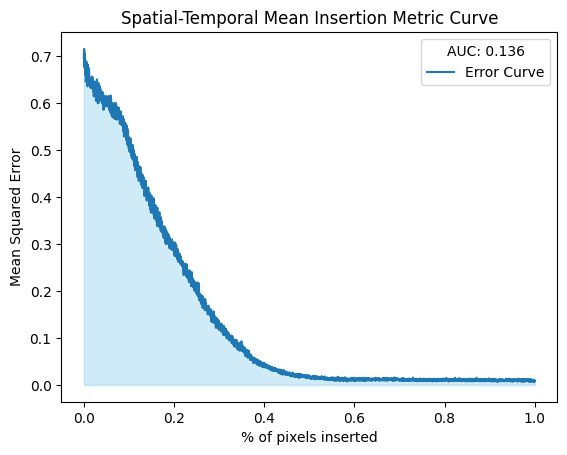

In [ ]:
# Mean errors on Insertion

# Combine insertion statistics from all LSTM instances into a single list
st_insertion_stats_vott_all_lstm = [st_insertion_stats_vott_norm_0to20, st_insertion_stats_vott_norm_20to40,
                                     st_insertion_stats_vott_norm_40to60, st_insertion_stats_vott_norm_60to80,
                                     st_insertion_stats_vott_norm_80to100, st_insertion_stats_vott_norm_100to105]

# Initialize a list to store only the error values from insertion statistics
only_errors_insertion_vott = []

# Loop through all insertion statistics and extract error values
for stats in st_insertion_stats_vott_all_lstm:
    for errors, _ in stats:
        only_errors_insertion_vott.append(errors)

# Calculate the mean errors for insertion across all instances
mean_errors_for_insertion_vott = np.mean(only_errors_insertion_vott, axis=0)
print("Mean Errors for Nr of Pixel Inserted, Vottignasco: \n", mean_errors_for_insertion_vott)

# Plot the error curve and area under the curve (AUC)
x = [i / 4160 for i in range(0, 4161)]  # Create an x-axis for the percentage of pixels inserted
auc_ins_st = round(np.trapz(mean_errors_for_insertion_vott, x), 3)  # Calculate the AUC using the trapezoidal rule
plt.plot(x, mean_errors_for_insertion_vott, label='Error Curve')  # Plot the mean error curve
plt.fill_between(x, mean_errors_for_insertion_vott, color='skyblue', alpha=0.4)  # Fill the area under the curve
plt.xlabel('% of pixels inserted')  # Set x-axis label
plt.ylabel('Mean Squared Error')  # Set y-axis label
plt.title('Spatial-Temporal Mean Insertion Metric Curve')  # Set the title of the plot
plt.legend(title=f"AUC: {auc_ins_st}")  # Display the legend with AUC value
plt.show()  # Show the plot


In [ ]:
# Import the DELETION statistics for each instance in the Vottignasco Test Set

# Load deletion statistics for different segments of the test set
st_deletion_stats_vott_norm_0to20 = np.load(f"{results_st_path}st_deletion_stats_vott_norm_0to20.npy", allow_pickle=True)
st_deletion_stats_vott_norm_20to40 = np.load(f"{results_st_path}st_deletion_stats_vott_norm_20to40.npy", allow_pickle=True)
st_deletion_stats_vott_norm_40to60 = np.load(f"{results_st_path}st_deletion_stats_vott_norm_40to60.npy", allow_pickle=True)
st_deletion_stats_vott_norm_60to80 = np.load(f"{results_st_path}st_deletion_stats_vott_norm_60to80.npy", allow_pickle=True)
st_deletion_stats_vott_norm_80to100 = np.load(f"{results_st_path}st_deletion_stats_vott_norm_80to100.npy", allow_pickle=True)
st_deletion_stats_vott_norm_100to105 = np.load(f"{results_st_path}st_deletion_stats_vott_norm_100to105.npy", allow_pickle=True)


Spatial-Temporal Mean Errors for Nr of Pixel Deleted, Vottignasco: 
 [0.         0.00717778 0.01011959 ... 0.71538122 0.70857133 0.72285865]


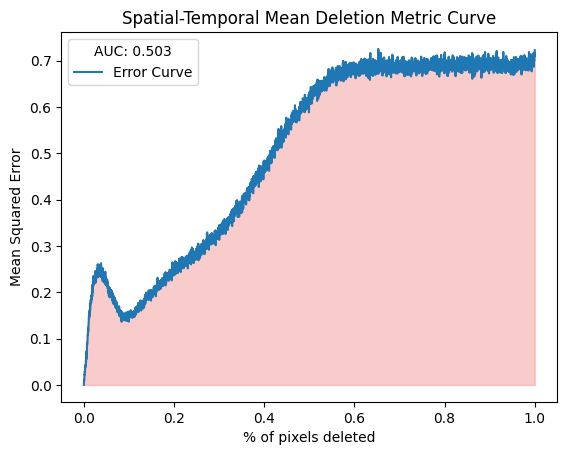

In [ ]:
# Mean Errors for Deletion

# Combine deletion statistics from different segments of the test set
st_deletion_stats_vott_all_lstm = [st_deletion_stats_vott_norm_0to20, st_deletion_stats_vott_norm_20to40,
                                  st_deletion_stats_vott_norm_40to60, st_deletion_stats_vott_norm_60to80,
                                  st_deletion_stats_vott_norm_80to100, st_deletion_stats_vott_norm_100to105]

only_errors_deletion_vott = []
# Extract errors from deletion statistics
for stats in st_deletion_stats_vott_all_lstm:
  for errors, _ in stats:
    only_errors_deletion_vott.append(errors)

# Calculate mean errors for deletion
mean_errors_for_deletion_vott = np.mean(only_errors_deletion_vott, axis=0)
print("Spatial-Temporal Mean Errors for Nr of Pixel Deleted, Vottignasco: \n", mean_errors_for_deletion_vott)

# Plot the error curve and area under the curve (AUC)
x = [i/4160 for i in range(0, 4161)]
auc_del_st = round(np.trapz(mean_errors_for_deletion_vott, x), 3)
plt.plot(x, mean_errors_for_deletion_vott, label='Error Curve')
plt.fill_between(x, mean_errors_for_deletion_vott, color='lightcoral', alpha=0.4)
plt.xlabel('% of pixels deleted')
plt.ylabel('Mean Squared Error')
plt.title('Spatial-Temporal Mean Deletion Metric Curve')
plt.legend(title=f"AUC: {auc_del_st}")
plt.show()


## ***Spatial-RISE***

In [ ]:
# Import statistics for Insertion for each instance in the Vottignasco Test Set

# NOTE: HERE I ONLY SAVED THE ERRORS. I STILL NEED TO CALCULATE THE MEAN
spatial_only_errors_for_insertion_vott_norm = np.load(f"{results_s_path}only_errors_insertion_vott_norm_sm_all_instances.npy", allow_pickle=True)

Spatial Mean Errors for % of Pixel Inserted, Vottignasco: 
 [0.68935007 0.649762   0.5680377  0.48797476 0.4874884  0.45347995
 0.4096954  0.3509677  0.28131866 0.2876833  0.24008006 0.22115493
 0.20954682 0.1852449  0.1827948  0.16909349 0.16018379 0.16120307
 0.13481379 0.13415891 0.11455316 0.10039388 0.09749839 0.07252178
 0.07024122 0.06855167 0.05360226 0.05363721 0.05237358 0.05016464
 0.03537033 0.03624142 0.03971437 0.02960313 0.0307397  0.02431518
 0.01968409 0.02060199 0.01454559 0.01260914 0.00931743]


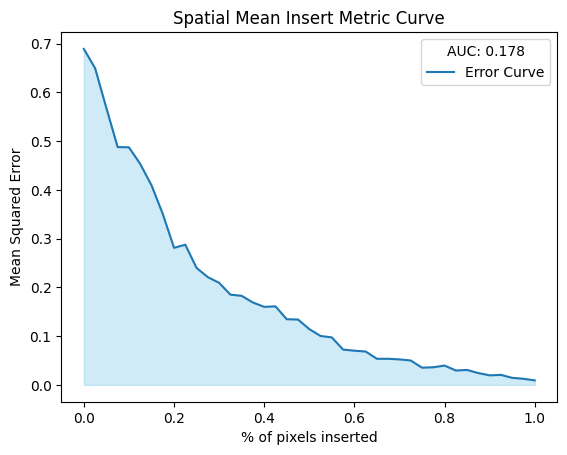

In [ ]:
# Calculate the mean errors for Insertion based on the spatial only errors
spatial_mean_errors_for_insertion_vott_norm = np.mean(spatial_only_errors_for_insertion_vott_norm, axis=0)
print("Spatial Mean Errors for % of Pixel Inserted, Vottignasco: \n", spatial_mean_errors_for_insertion_vott_norm)

# Plot the error curve and area under the curve (AUC)
x = [i/4160 for i in range(0, 4161, 104)] # Insert 104 pixels in each step of insertion for the instance
auc_ins_s = round(np.trapz(spatial_mean_errors_for_insertion_vott_norm, x),3)
plt.plot(x, spatial_mean_errors_for_insertion_vott_norm, label='Error Curve')
plt.fill_between(x, spatial_mean_errors_for_insertion_vott_norm, color='skyblue', alpha=0.4)
plt.xlabel('% of pixels inserted')
plt.ylabel('Mean Squared Error')
plt.title('Spatial Mean Insert Metric Curve')
plt.legend(title = f"AUC: {auc_ins_s}")
plt.show()


In [ ]:
# Import the statistics for Deletion for each instance in the Vottignasco Test Set

# NOTE: HERE I HAVE ONLY SAVED THE ERRORS. I STILL NEED TO CALCULATE THE MEAN
spatial_only_errors_for_deletion_vott_norm = np.load(f"{results_s_path}only_errors_deletion_vott_norm_sm_all_instances.npy", allow_pickle=True)

Mean Errors for % of Pixel Removed, Vottignasco: 
 [0.         0.02787292 0.09400471 0.11125742 0.17797255 0.2592638
 0.19905225 0.17146711 0.18069647 0.18294525 0.1848203  0.19595735
 0.20587078 0.23284114 0.27666686 0.35272742 0.39916567 0.44942853
 0.45554965 0.46340281 0.46696701 0.48440063 0.47412805 0.5575742
 0.58244429 0.61738743 0.61952287 0.61830266 0.62277325 0.64576195
 0.65976793 0.69417226 0.68860459 0.70500143 0.70772482 0.72525794
 0.70649313 0.67492051 0.69527048 0.68911157 0.70147682]


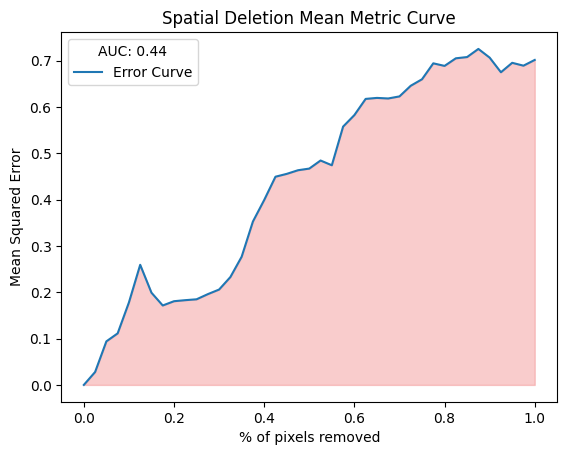

In [ ]:
# Calculate the mean errors for the percentage of pixels removed, Vottignasco
spatial_mean_errors_for_deletion_vott = np.mean(spatial_only_errors_for_deletion_vott_norm, axis=0)
print("Mean Errors for % of Pixel Removed, Vottignasco: \n", spatial_mean_errors_for_deletion_vott)

# Plot the error curve and area under the curve (AUC)
x = [i/4160 for i in range(0, 4161, 104)]  # In each removal step, 104 pixels are removed from the instance
auc_del_s = round(np.trapz(spatial_mean_errors_for_deletion_vott, x), 3)
plt.plot(x, spatial_mean_errors_for_deletion_vott, label='Error Curve')
plt.fill_between(x, spatial_mean_errors_for_deletion_vott, color='lightcoral', alpha=0.4)
plt.xlabel('% of pixels removed')
plt.ylabel('Mean Squared Error')
plt.title('Spatial Deletion Mean Metric Curve')
plt.legend(title=f"AUC: {auc_del_s}")
plt.show()

## ***Temporal-RISE***

In [ ]:
# Import the statistics on Insertion for each instance in the Vottignasco Test Set
temporal_insertion_stats_vott_norm_all_lstm = np.load(f"{results_t_path}temporal_insertion_stats_vott_norm_all_lstm.npy", allow_pickle=True)

Temporal Mean Errors for Nr of Pixel Inserted, Vottignasco: 
 [0.6958838  0.70569575 0.6991336  ... 0.01040283 0.00932912 0.00882481]


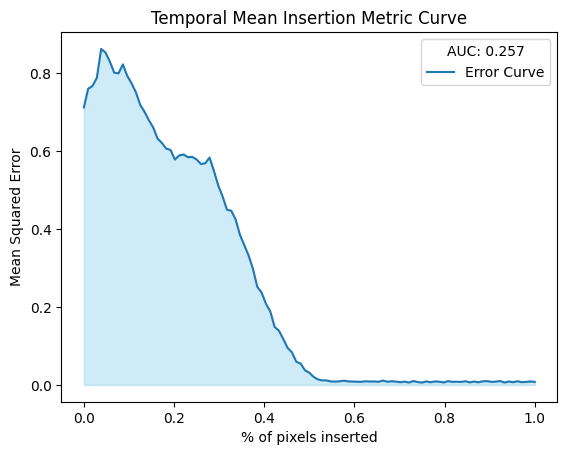

In [ ]:
# TEMPORAL MEAN ERRORS for INSERTION

# Extract the only errors for Insertion from the statistics
temporal_only_errors_insertion_vott = [errors for errors,_ in temporal_insertion_stats_vott_norm_all_lstm]

# Compute the mean errors for Insertion
temporal_mean_errors_for_insertion_vott = np.mean(temporal_only_errors_insertion_vott, axis=0)
print("Temporal Mean Errors for Nr of Pixel Inserted, Vottignasco: \n", mean_errors_for_insertion_vott)

# Plot the error curve and area under the curve (AUC)
x = [i/4160 for i in range(0, 4161, 40)]  # Add 40 pixels for each insertion in the instance
auc_ins_t = round(np.trapz(temporal_mean_errors_for_insertion_vott, x),3)
plt.plot(x, temporal_mean_errors_for_insertion_vott, label='Error Curve')
plt.fill_between(x, temporal_mean_errors_for_insertion_vott, color='skyblue', alpha=0.4)
plt.xlabel('% of pixels inserted')
plt.ylabel('Mean Squared Error')
plt.title('Temporal Mean Insertion Metric Curve')
plt.legend(title = f"AUC: {auc_ins_t}")
plt.show()

In [ ]:
# Import the statistics on Deletion for each instance in the Vottignasco Test Set

temporal_deletion_stats_vott_norm_all_lstm = np.load(f"{results_t_path}temporal_deletion_stats_vott_norm_all_lstm.npy", allow_pickle=True)

Mean Errors for Nr of Pixel Removed, Vottignasco: 
 [0.         0.06443477 0.10296772 0.20499313 0.29608282 0.33879803
 0.38401278 0.40736084 0.41034752 0.42922965 0.40888606 0.40516811
 0.38090395 0.38400538 0.35587322 0.34573541 0.32419246 0.30339504
 0.28804465 0.27248885 0.23971406 0.22846127 0.21403045 0.20490635
 0.19141351 0.18963044 0.1921701  0.1925301  0.19289753 0.18510525
 0.18003479 0.18485225 0.17895448 0.19479964 0.1881454  0.19207758
 0.19678623 0.20372437 0.20186782 0.22498211 0.22534002 0.24233789
 0.25614237 0.26682375 0.29120576 0.32850463 0.33669646 0.3646275
 0.39149984 0.430781   0.45171583 0.49402567 0.51031524 0.56800644
 0.57699749 0.61225452 0.61173878 0.62638915 0.61692118 0.65089964
 0.65742403 0.65236772 0.66633017 0.66432982 0.66446854 0.66490515
 0.67046687 0.67475526 0.68660942 0.68521895 0.68861757 0.69970011
 0.68304438 0.70576892 0.6915613  0.68497747 0.70410749 0.69202714
 0.69982657 0.69730248 0.68926249 0.69274817 0.69098426 0.70979568
 0.69558293

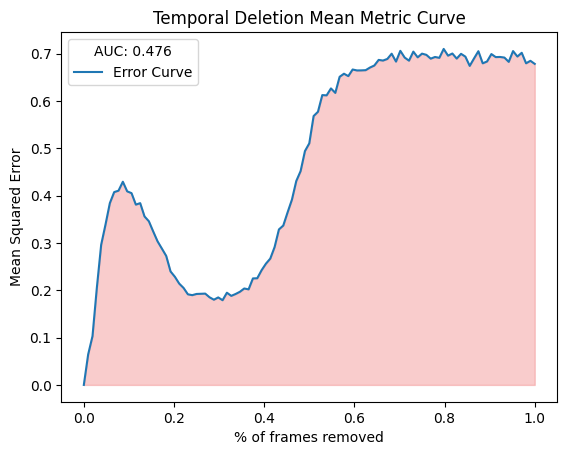

In [ ]:
# TEMPORAL MEAN ERRORS for DELETION

# Extract the only errors for Deletion from the statistics
only_errors_deletion_vott_norm = [errors for errors,_ in temporal_deletion_stats_vott_norm_all_lstm]

# Compute the mean errors for Deletion
tempora_mean_errors_for_deletion_vott = np.mean(only_errors_deletion_vott_norm, axis=0)
print("Mean Errors for Nr of Pixel Removed, Vottignasco: \n", tempora_mean_errors_for_deletion_vott)

# Plot the error curve and area under the curve (AUC)
x = [i/4160 for i in range(0, 4161, 40)]  # Add 40 pixels for each removal in the instance
auc_del_t = round(np.trapz(tempora_mean_errors_for_deletion_vott, x),3)
plt.plot(x, tempora_mean_errors_for_deletion_vott, label='Error Curve')
plt.fill_between(x, tempora_mean_errors_for_deletion_vott, color='lightcoral', alpha=0.4)
plt.xlabel('% of frames removed')
plt.ylabel('Mean Squared Error')
plt.title('Temporal Deletion Mean Metric Curve')
plt.legend(title = f"AUC: {auc_del_t}")
plt.show()


## ***Common Plots***

In [ ]:
# Compute AUC
methods = ["S-RISE", "T-RISE", "ST-RISE"]

auc_list_ins = {methods[0]: auc_ins_s,
                methods[1]: auc_ins_t,
                methods[2]: auc_ins_st}

auc_list_ins = dict(sorted(auc_list_ins.items(), key=lambda item: item[1], reverse = True))

auc_list_del = {methods[0]: auc_del_s,
                methods[1]: auc_del_t,
                methods[2]: auc_del_st}

auc_list_del = dict(sorted(auc_list_del.items(), key=lambda item: item[1], reverse = True))

print("AUC ins: ", auc_list_ins)
print("AUC del: ", auc_list_del)

AUC ins:  {'T-RISE': 0.257, 'S-RISE': 0.178, 'ST-RISE': 0.136}
AUC del:  {'ST-RISE': 0.503, 'T-RISE': 0.476, 'S-RISE': 0.44}


In [ ]:
# x_st: Represents the percentage of pixels for insertion across the entire range of 0 to 4160
x_st = [i/4160 for i in range(0, 4161)]

# x_s: Represents the percentage of pixels for insertion in steps of 104 pixels
# Each step corresponds to the insertion of 104 pixels in the instance
x_s = [i/4160 for i in range(0, 4161, 104)]

# x_t: Represents the percentage of pixels for insertion in steps of 40 pixels
# Each step corresponds to the insertion of 40 pixels in the instance
x_t = [i/4160 for i in range(0, 4161, 40)]


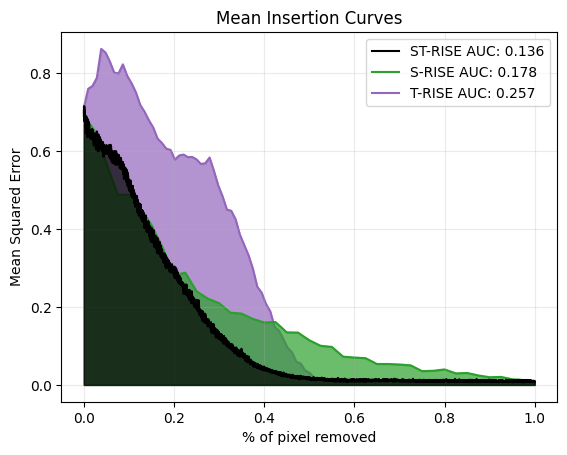

In [ ]:
### INSERTION

#st:
st_ins_order = list(auc_list_ins.keys()).index("ST-RISE")
plt.plot(x_st, mean_errors_for_insertion_vott, label=f'ST-RISE AUC: {auc_list_ins["ST-RISE"]}',
                       color = "black", zorder = st_ins_order)
plt.fill_between(x_st, mean_errors_for_insertion_vott,
                               color='black', alpha=0.7, zorder = st_ins_order)

#s:
s_ins_order = list(auc_list_ins.keys()).index("S-RISE")
plt.plot(x_s, spatial_mean_errors_for_insertion_vott_norm, label=f'S-RISE AUC: {auc_list_ins["S-RISE"]}',
                      color = "tab:green", zorder = s_ins_order)
plt.fill_between(x_s, spatial_mean_errors_for_insertion_vott_norm,
                              color="tab:green", alpha=0.7, zorder = s_ins_order)

#t:
t_ins_order = list(auc_list_ins.keys()).index("T-RISE")
plt.plot(x_t, temporal_mean_errors_for_insertion_vott, label=f'T-RISE AUC: {auc_list_ins["T-RISE"]}',
                      color = "tab:purple", zorder = t_ins_order)
plt.fill_between(x_t, temporal_mean_errors_for_insertion_vott,
                              color="tab:purple", alpha=0.7, zorder = t_ins_order)

plt.xlabel('% of pixel removed')
plt.ylabel('Mean Squared Error')
plt.title('Mean Insertion Curves')
plt.grid(alpha = 0.25)
plt.legend()

plt.savefig(f"{results_path}mean_insertion_curves.png", transparent = True , dpi = 400, bbox_inches = 'tight')

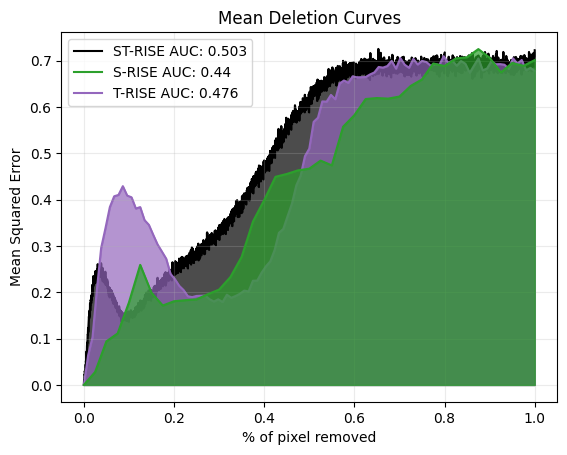

In [ ]:
### INSERTION

#st:
st_ins_order = list(auc_list_del.keys()).index("ST-RISE")
plt.plot(x_st, mean_errors_for_deletion_vott, label=f'ST-RISE AUC: {auc_list_del["ST-RISE"]}',
                       color = "black", zorder = st_ins_order)
plt.fill_between(x_st, mean_errors_for_deletion_vott,
                               color='black', alpha=0.7, zorder = st_ins_order)

#s:
s_ins_order = list(auc_list_del.keys()).index("S-RISE")
plt.plot(x_s, spatial_mean_errors_for_deletion_vott, label=f'S-RISE AUC: {auc_list_del["S-RISE"]}',
                      color = "tab:green", zorder = s_ins_order)
plt.fill_between(x_s, spatial_mean_errors_for_deletion_vott,
                              color="tab:green", alpha=0.7, zorder = s_ins_order)

#t:
t_ins_order = list(auc_list_del.keys()).index("T-RISE")
plt.plot(x_t, tempora_mean_errors_for_deletion_vott, label=f'T-RISE AUC: {auc_list_del["T-RISE"]}',
                      color = "tab:purple", zorder = t_ins_order)
plt.fill_between(x_t, tempora_mean_errors_for_deletion_vott,
                              color="tab:purple", alpha=0.7, zorder = t_ins_order)

plt.xlabel('% of pixel removed')
plt.ylabel('Mean Squared Error')
plt.title('Mean Deletion Curves')
plt.grid(alpha = 0.25)
plt.legend()

plt.savefig(f"{results_path}mean_deletion_curves.png", transparent = True , dpi = 400, bbox_inches = 'tight')